## Keras and Tensorflow

Neural N/W's are supervised learning algorithms. We need to have a labelled dataset to apply neural networks.

Although all ml algorithms r dependent on data & some mathematical/statistical model based like line, tree, hyperplane etc but dl algorithms r more dependent on data (based on features) & for the functional form of neural n/w the complexity is huge (cant exactly say one line/hyperplane etc, it is a network),they r more stochastic/random in nature, the weights r being generated randomly all the time more randomness, but they give more accurate results cz of network architecture.

**Perceptron -> MLP -> Deep Neural Network**

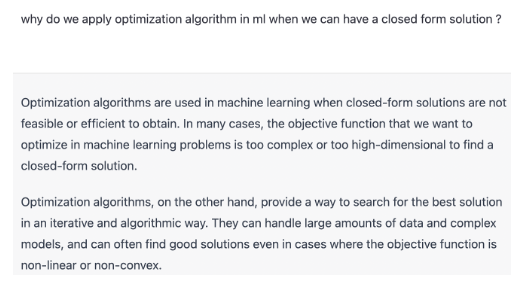

- Before this we talk about Scikit learn for neural network model building. However Keras and Tensorflow these 2 library r particularly devoted to deep learning/neural networks. They have more features for neural network model building in comparison to Scikit learn. Scikit learn is good for simple ML algorithms.
- For neural n/w's and higher models of NN like CNN, RNN, LSTM it is better to use Keras and Tensorflow because of wider options. In Scikit learn u have to prepare model from scratch.

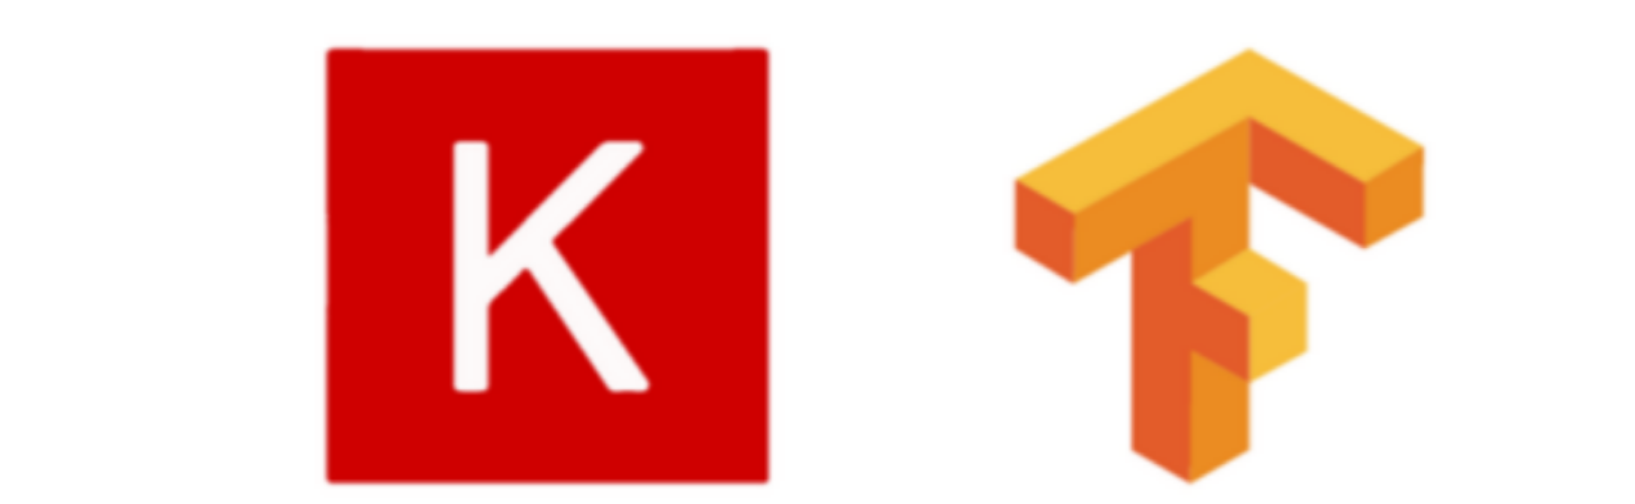

- Keras can be used seperately as well but we use it in conjugation with tensorflow.
- Earlier Keras was better library than tf but since development of tf2, it is at par with keras or better.


**About Keras**

Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. 
It was developed with a focus on enabling fast experimentation. Being able to go from idea to result as fast as possible is key to doing good research.

## <font color=blue> Core Data Structures of Keras -> Models and Layers (together form architecture of Neural Network)

- The main idea for using Keras for NN is that it has got 2 concepts, Concept of Models and concept of Layers.
- We have got different layers for different types of NN like in basic ANN - hidden layer, in CNN convolution layer, dropout layer, normalization layer etc
- The models part is about structure part of Neural Network that u r having.
- Model and the layers together form a neural network architecture.

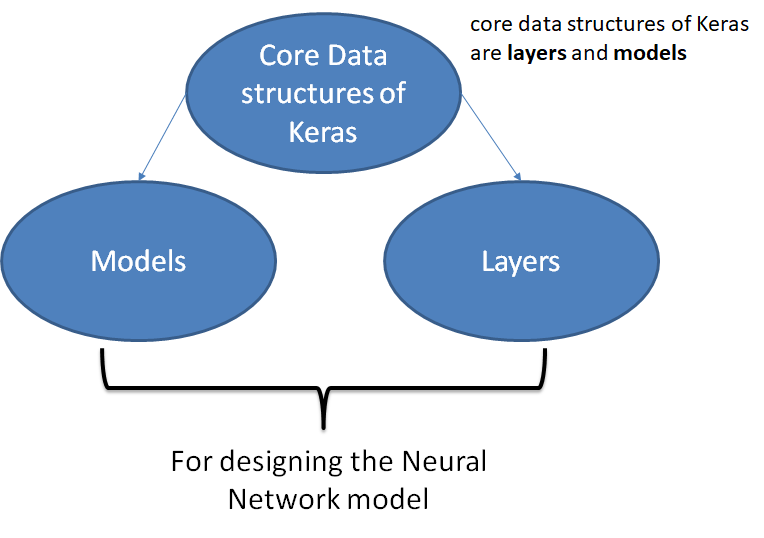

## Three types of models in Keras and different ways to build Keras models

- Sequential and functional are the models that r most frequently used. Other than that Model Subclassing. Model Subclassing is more for developers where u have to do everything from scatch else most work can be done with Sequential & Functional models.
- From programming point of view model Subclassing is quite good but from application point of view we generally focus on sequential or functional type of models.
- Functional model can be used in cases where u need to do both classification & regression on same dataset. So two tasks can be done simultaneously.

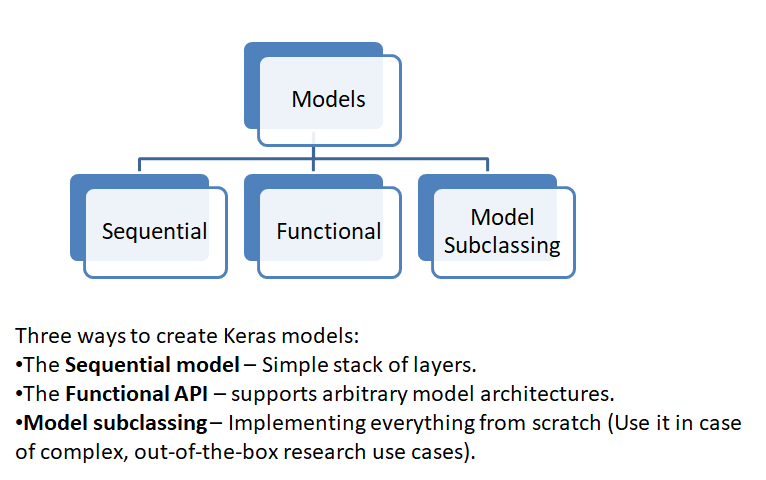

## Modality

Neural n/w's can be used for both classification and regression. Sometimes maybe in a single problem you need to do both classification and regression & hence there will be 2 objectives of same problem.

If we r given a combination of data that consists of images as well as text e.g. in iris we have available images (data in form of integers b/w 0 and 255) as well as tabular data (data like petallegth, sepalwidth etc) so that problem will be called a multi-modal problem where we have multi-modality. Modality we generally talk in terms of data. e.g. X-ray, CT_Scan, MRI can be considered as 3 modalities of data.

*<font color=blue>Sequential model*

**If Unimodal problem** (only 1 type of data) or **Single objective** problem either regression or classification then we go for Sequential model of keras. Sequential model is nothing but a connection of fully connceted layers layers. Only if u add more layers it becomes a deep neural network.

*<font color=blue>Functional Model*

If your problem is **multi-model** in nature (you have different types of data) or u r having **two objectives** to deal with simultaneously in ur problem then u can go for Functional model of keras.

# The Sequential model

- Also called as fully connected model or model with dense layers. By fully connected we mean each neuron of previous layer is connected with each neuron of the next layer. Also known as dense layers or fully connected layers. This terminology is w.r.t keras and tensorflow.
- It deals with only unimodal or single objective problems.

## Import useful libraries

In [1]:
import tensorflow as tf
from tensorflow import keras    # keras compatible with tensorflow
from tensorflow.keras import layers    # layers is a module in keras

### Sequential model - is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

Since we are in tensorflow we talk in terms of tensors.

Solving Neural Network with scikit learn library. Here we had to define a tuple which indicates neurons in each hidden layer, here we have 3 hidden layers with 150,100 and 50 neurons. In keras we can define layer by layer.



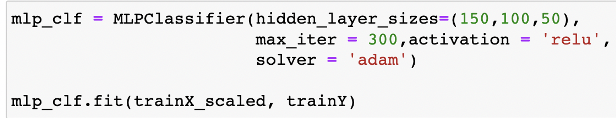

Fine tuning technique in scikit learn which is gridcv technique in which u can fine tune hyperparameters of algorithm that u r having.

**Note on Ragged, Sparse and Dense Tensor**


**Dense tensor only in terms of matrix representation, dense layer is different**

*Ragged tensor is one which is non-uniform (each row of different length) & can be filled with 0 to make a proper representation so maths calculations can take place. However it is not necessary that after filled with 0 ragged tensor will be a sparse tensor cz sparse tensor we r only referring to one which has many 0 entries.So a ragged tensor may not always convert to sparse tensor*

### Solving Neural Network with Keras and Tensorflow library.


Here in keras we can see flexibility of having different activation functions in the same model as compared to sklearn where u will have to do some modifications at ur end inorder to have different activation functions in different layers.

- Here adder function is automatic, adder function is only adding things, we do not define it seperately. 
- Activation function which is part of forward pass & a part of neural n/w architecture which provides value of node is defined in layers itself.
-  Dense terminology is used for fully connected layer i.e each neuron of previos layer is connected to each neuron of next layer.

In [2]:
# Define Sequential model with 3 layers
# keras.Sequential to instantiate sequential model & in that u have to define layers
# Here name of sequential model is given as model, can be anything

model = keras.Sequential(   #name of nn is model here & type of nn is sequential
    [
        layers.Dense(2, activation="relu", name="layer1"), # 2 is num of neurons in this layer
        # name is not mandatory but can be useful when u have several layers in ur network
        
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, activation = "sigmoid",name="layer3"),
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
print(x)
y = model(x)
print(y)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[0.11540954 0.69817567 0.18401031 0.519253  ]
 [0.11540954 0.69817567 0.18401031 0.519253  ]
 [0.11540954 0.69817567 0.18401031 0.519253  ]], shape=(3, 4), dtype=float32)


2023-03-22 13:55:24.151586: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


is equivalent to this function:

In [3]:
# Create 3 layers
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="sigmoid", name="layer2")
layer3 = layers.Dense(4, name="layer3")

# Call layers on a test input
x = tf.ones((3, 3))
y = layer3(layer2(layer1(x)))
y

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[ 0.24455914, -1.0017811 ,  0.9194634 ,  0.13071318],
       [ 0.24455914, -1.0017811 ,  0.9194634 ,  0.13071318],
       [ 0.24455914, -1.0017811 ,  0.9194634 ,  0.13071318]],
      dtype=float32)>

### Creating a Sequential model
by passing a list of layers

In [4]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)

Its layers are accessible via the layers attribute:

In [5]:
model.layers   # info about layers - dense layers

# 0x7fbbf9c54280 memory location where layers r being stored

### add and pop methods for adding and deleting the layers

Just like data structures - lists, tuples, dictionaries these neural networks r also dynamic structure. You can add or delete a layer to it.

Keras & tf r specifically used for neural networks. They make the structure or architecture very flexible.

Creating a Sequential model incrementally via the add() method

In [6]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="sigmoid"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(4))

 We can check the number of layers in a NN model throgh len. Last layer may be o/p layer above. In keras o/p defined through layer. This was not in Scikit learn that o/p is defined seperately.

In [7]:
print(len(model.layers))

3


pop() method removes the layers: a Sequential model behaves very much like a list of layers.

In [8]:
model.pop()               # pop will remove last layer
print(len(model.layers))  # 2

2


We can also give specific names to the models and the layers.

In [9]:
model = keras.Sequential(name="my_sequential")
model.add(layers.Dense(2, activation="sigmoid", name="layer1"))
model.add(layers.Dense(3, activation="relu", name="layer2"))
model.add(layers.Dense(4, name="layer3"))

In [10]:
# **Note** 

# You can use either of below methods to define neural networks-


# **Method1**

# <!-- model = keras.Sequential(
#     [
#         layers.Dense(2, activation="relu"),
#         layers.Dense(3, activation="relu"),
#         layers.Dense(4),
#     ]
# ) 
#  -->

# **Method2**

# <!-- model = keras.Sequential(name="my_sequential")
# model.add(layers.Dense(2, activation="sigmoid", name="layer1"))
# model.add(layers.Dense(3, activation="relu", name="layer2"))
# model.add(layers.Dense(4, name="layer3")) -->

# Specifying the input shape in advance
Generally, all layers in Keras need to know the shape of their inputs in order to be able to create their weights. So when you create a layer like this, initially, it has no weights:

### The usual basic libraries

In [11]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')


Two important libraries we need to have models library and layers library in keras.

- keras.models
- keras.layers

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import BatchNormalization 
#from keras.utils import np_utils

### 1. Importing the Iris dataset.

In [13]:
##data = pd.read_csv("C:\\Users\\user\\Downloads\\Iris_1.csv")
data = pd.read_csv("datasets/iris.csv")

In [14]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
# Using the apply function, for every column, we find the total amount of NULL/NA values
data.apply(lambda x: sum(x.isnull()))

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### 2. Splitting the given data into the input(x) and output data(y).

Can use drop method or iloc method as below to split into x and y.

In [16]:
data.iloc[:,1:5]
x = data.iloc[:,1:5].values
y = data.iloc[:,5]
y = data.iloc[:,5].values

### 3. label encoding to transform the objects of output data into numerical values.

In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 4. Creating the sequential model 

Another useful feature of Keras is u can get summary of model.

In [18]:
model = Sequential() 
# API=Application Programming Interface
# Input_dim = 4 for the 4 features of a single sample.

# mention the number of neurons in 1st hidden layer (=8 in this case)
model.add(Dense(8, name= 'First_Hidden_layer', input_dim=4, activation="relu")) 

# Second dense layer has 4 neurons
model.add(Dense(4,name= 'Second_Hidden_layer', activation="relu"))

# Third dense layer has 3 neurons. 
model.add(Dense(4,name= 'Third_layer', activation="softmax"))  # A problem which has 4 o/p's
### for multiclass problems use softmax

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_Hidden_layer (Dense)  (None, 8)                 40        
                                                                 
 Second_Hidden_layer (Dense)  (None, 4)                36        
                                                                 
 Third_layer (Dense)         (None, 4)                 20        
                                                                 
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


**<font color= blue>Summary Explanation**

- **First_Hidden_layer (Dense)** -> input layer 4 neurons * 8 neurons in 1st hidden layer + 8 bias = 40
- **Second_Hidden_layer (Dense)** -> 1st hidden layer 8 * 2nd hidden layer 4 + 4 bias = 36
- **Third_layer (Dense)** -> 2nd hidden layer 4 * 3rd hidden layer 4 + 4 bias = 20
- **Total trainable parameters** -> which is weights & biases together -> 40+36+20 = 96

*You need to generate the summary of your network because people r not so much interested in the architecture but the complexity of the n/w u have prepared.*

## Undersanding the Summary

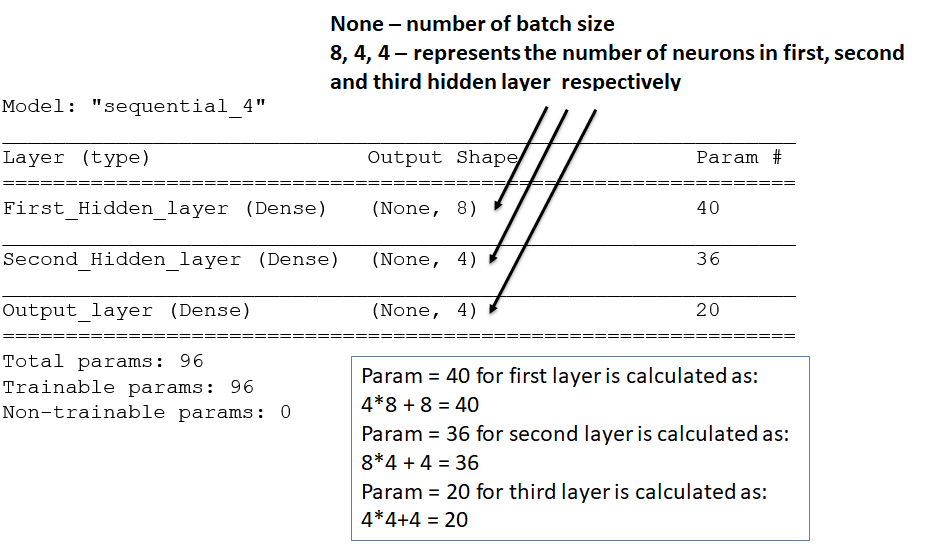

### Dense layer:  fully connected layer in a neural network.

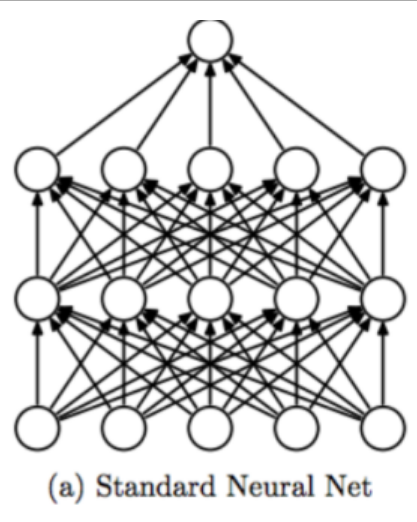

### Output Shape: (None,  8)
None here represents batch size and 8 represents number of neurons in hidden layer.

### Param #: 
This column shows the number of parameters that are trained for each layer.

### Trainable params:
Trainable parameters are the number of trainable elements in the network; neurons that are affected by backpropagation. For example, for the Wx + b operation in each neuron, W and b are trainable.

### Non Trainable params:
non-trainable parameters of a model are those that are not updated and optimized during training, and that have to be defined a priori, or passed as inputs.

## Visualizing the Neural Network structures

### <font color=blue>Method 1 - Visualizing the structure through utils function

*<b>Note</b> - In model.summary you will only get summary of 1st hidden layer, 2nd hidden layer and o/p layer while in visualization you will also be able to get information about input layer apart from 1st hidden layer, 2nd hidden layer and o/p layer.*

In [19]:
#pip install pydot

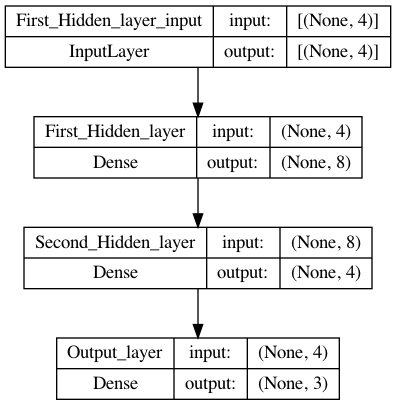

In [20]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
model = Sequential() 
# API=Application Programming Interface
# Input_dim = 4 for the 4 features of a single sample.

# First dense layer has 4 input nodes and 8 output nodes
model.add(Dense(8, name= 'First_Hidden_layer', input_dim=4, activation="relu")) 
# Second dense has 8 input nodes and 4 output nodes
model.add(Dense(4,name= 'Second_Hidden_layer', activation="relu"))
# Third dense layer has 4 input layer and 3 output node. This is the final output layer to show the result for binary classification. 
model.add(Dense(3,name= 'Output_layer', activation="softmax"))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)



### <font color=blue>Method-2 Visualizing the ANN Model through graphviz - a graph visualization library


In [21]:
#pip install ann_visualizer
#pip install graphviz
#pip install pydot

In [22]:
# import os
# os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin'

from ann_visualizer.visualize import ann_viz;


import keras;
from keras.models import Sequential;
from keras.layers import Dense;

network = Sequential();
        #Hidden Layer#1
network.add(Dense(units=8,
                  activation='relu',
                  input_dim=4))

        #Hidden Layer#2
network.add(Dense(units=4,
                  activation='relu'))
        #Exit Layer
network.add(Dense(units=3,activation='softmax'))

network.summary()


ann_viz(network, view=True, title="plotted with graphviz",filename='network.gv');

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 40        
                                                                 
 dense_7 (Dense)             (None, 4)                 36        
                                                                 
 dense_8 (Dense)             (None, 3)                 15        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


### Your output will be stored as a pdf file

- Below architecture for problem of iris. We have 4 input neurons, 8 and 4 neurons in 1st and 2nd hidden layer and 3 o/p classes so 3 neurons in o/p layer.
- The connection shows u that we r talking about a fully connected neural n/w.

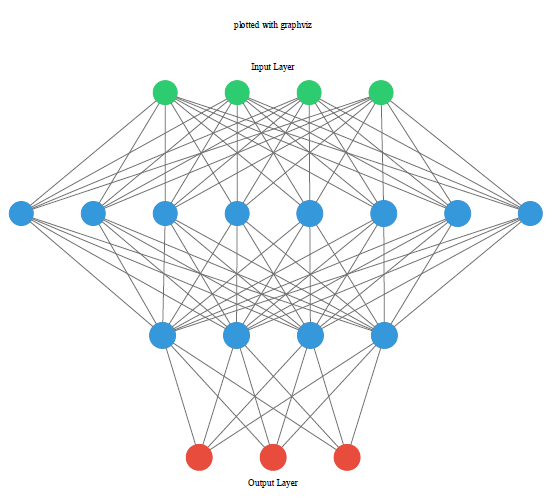

## Dense layer:  
It is a fully connected layer in a neural network.
##  Dropout layer:  (A part of regularization)

**Dropout is a regularization method that is placed under layers module of Keras**

It ignores a set of neurons (randomly) see in the picture below. This is used to prevent the network from overfitting. It is a part of regularization techniques & used to improve the performance of a neural network. In general regularization techniques r used to improve the performance of ML algorithms.

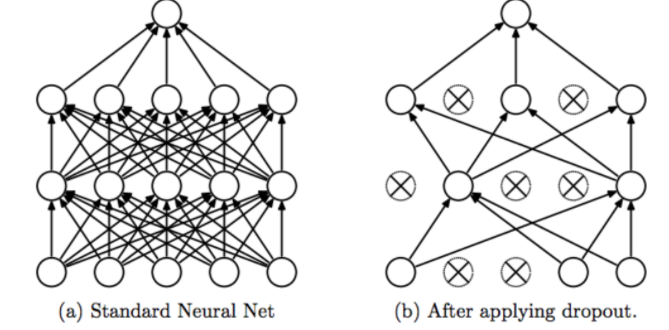

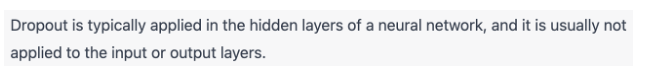

## The Dropout layer

**Overfitting** When we r having a very deep neural n/w,  the problem of overfitting may take place. You may train ur model too well for the training data but for testing data it is not performing good hence in that case ur model is overfitting. The reason for this overfitting is u r passing too much of information.

* It ignores a set of neurons (randomly) as per the parameter settings. So dropout helps to make ur architecture a little more random in nature & addition of dropout layer will help u in preventing problem of overfitting.
* **A dropout rate of 20% (or 0.2) implies that 20% o the neurons of a given layer will be ignored at random** In every epoch the neurons that r ignored can be different.
***Dropouts may prevent the network from overfitting**
* Dropout layer has a similarity with L2 regularization in ML. Although concept is somewhat different, L1 and L2 r more mathematically oriented.
* Dropout generally taken as 0.2, 0.3 or upto 0.4 depending on depth of neural n/w that we r having. But generally dropout we do not take a v.high number else chance of missing out on some important information.
* We try to keep dropout in a way that information is preserved also but process is random also in nature.

*Although dropout is more of a concept, it comes under layers module of Keras*

*Dropout in itself is not a part of hyperparameter, it can be said that we use dropout for hyperparameter tuning. Dropout is a part of regularization techniques*

### <font color=blue>**Architecture part of neural network** (Used in Forward Pass)
 
Here u define - 
    
1. Type of architecture - Sequential
2. Type of layers
3. Number of neurons in each layer


In [23]:
from keras.layers import Dense,Dropout 
model = Sequential() 
# Input_dim = 4 for the 4 features of a single sample.
# First dense layer has 4 input nodes and 8 output nodes
model.add(Dense(8, name= 'First_Hidden_layer', input_dim=4, activation="relu")) 

# Second dense has 8 input nodes and 4 output nodes
model.add(Dense(4,name= 'Second_Hidden_layer', activation="relu"))
model.add(Dropout(0.2))

# Third dense layer has 4 input lnodes and 3 output node. This is the final output layer to show the result for binary classification. 
model.add(Dense(3,name= 'Output_layer', activation="softmax"))

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_Hidden_layer (Dense)  (None, 8)                 40        
                                                                 
 Second_Hidden_layer (Dense)  (None, 4)                36        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 Output_layer (Dense)        (None, 3)                 15        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


Usually you see non-trainable parameters as 0 only cz they r input parameters/features which have already been defined & are not adjusted during the training.

*Dropout is reflected in summary with same shape after which layer it has been added but parameters will be 0 because there r no tunable/adjustable parameters. These neurons r just ignored.*

- Till above is forward pass in terms of working of neural network where u define number of neurons & activation function.
- Then afterwards there is backward pass, Inorder to complete working of neural n/w u need to compile it and for compilation u have to define error function & have to define the optimizer.

### <font color=blue>**Compilation part of neural network** (Used in Backward Pass)


Here u define - 
    
1. Error function which is termed as loss function in keras
2. Optimizer
3. Metrics for evaluation

In [24]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Additionally


### Layer weight initializers - Usage of initializers

In most of models generally the weights are generated randomly. In most of models we do not define them seperately, they r automatically generated by system as random weights from uniform distribution b/w 0 and 1. But it is possible to define them yourself using a different distribution.

Initializers define the way to set the initial random weights of Keras layers.

The keyword arguments used for passing initializers to layers depends on the layer. Usually, it is simply kernel_initializer and bias_initializer:


*<b>Initializers library consists of various functions for initializing the weights and biases</b>*

*<b>kernel_initializer is for weight initialization and bias_initializer is for bias initaialzation </b>*


According to number of units/neurons, the weights will be produced. Wights and biases both are updated in every epoch.

In [25]:
from tensorflow.keras import layers
from tensorflow.keras import initializers  
# initializers library consists of functions for initializing the weights and biases.

layer = layers.Dense(
    units=64,
    kernel_initializer=initializers.RandomNormal(stddev=0.01),# weights as normal distribution
    bias_initializer=initializers.Zeros()    # bias initialized as 0
)
# bias helps in more flexibility, the movement of line/equation we r having.

In [26]:
#### All built-in initializers can also be passed via their string identifier:

layer = layers.Dense(
    units=64,
    kernel_initializer='random_normal',
    bias_initializer='zeros'
)

### Available initializers

    The following built-in initializers are available as part of the tf.keras.initializers module:
    RandomNormal class

You can define with your own mean and stddev the random normal distribution.

In [27]:
tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None);

### https://keras.io/api/layers/initializers/

#### Keras and Tensorflow
    Keras is a neural network library while TensorFlow is the open-source library for a number of various tasks in 
    machine learning. 
    TensorFlow provides both high-level and low-level APIs while Keras provides only high-level APIs. 
    Keras is built in Python which makes it way more user-friendly than TensorFlow

#### Difference between using import keras and import tensorflow.keras
    tensorflow.keras imports use TensorFlow repository code, whereas keras imports use Keras repository code. 
    The two use independent method/class implementations, even if keras imports from tensorflow.
    tensorflow.keras is recommended per being better maintaned and more up-to-date - unless you use TF <2, where the two are at par for most part

## Keras layers API
    Layers are the basic building blocks of neural networks in Keras. 
    A layer consists of a tensor-in tensor-out computation function (the layer's call method) and some state, held in TensorFlow variables (the layer's weights).

**A Layer instance is callable, much like a function** You can make use of layers like a function.

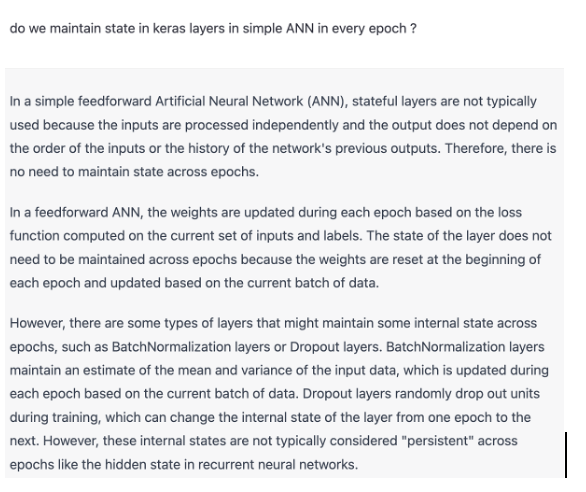

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

layer = layers.Dense(32, activation='relu')
inputs = tf.random.uniform(shape=(10, 20))
outputs = layer(inputs)

"""Unlike a function, though, layers maintain a state, 
updated when the layer receives data during training, and stored in layer.weights:"""

print(layer.weights)

[<tf.Variable 'dense_11/kernel:0' shape=(20, 32) dtype=float32, numpy=
array([[ 2.08369374e-01, -2.35096723e-01, -1.01314440e-01,
        -6.46112561e-02, -1.70793310e-01,  1.62404954e-01,
         2.27007270e-01, -3.16278666e-01, -1.25639230e-01,
         2.19059944e-01,  3.19995701e-01, -3.02120239e-01,
         1.25915557e-01,  1.97327733e-01, -3.30353290e-01,
        -1.77871227e-01,  2.57402837e-01,  2.11033285e-01,
        -2.93029159e-01,  4.17145789e-02, -5.87000251e-02,
        -1.23613670e-01,  9.02878642e-02,  6.72912598e-02,
         5.50794303e-02,  2.11912394e-02, -1.42467916e-02,
         5.04729748e-02,  2.05734432e-01, -3.35258007e-01,
        -2.81427622e-01, -2.04131439e-01],
       [-2.42865860e-01,  1.59763396e-02, -3.23877752e-01,
        -3.13846409e-01, -9.44075733e-02,  1.39221191e-01,
         1.86097860e-01,  1.75994456e-01, -2.95171022e-01,
         2.22506344e-01, -1.07408538e-01,  3.13848078e-01,
         1.53162003e-01, -3.03004771e-01, -2.30856895e-01,
 

#### Reference: https://keras.io/guides/sequential_model/

### Softmax function
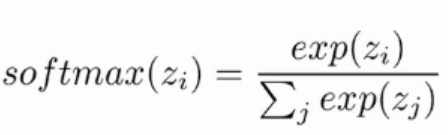

This function will give you result in terms of Probability. 

## Selection of Loss functions 
#### Binary Classification  - binary cross entropy
#### Multclass Classification - 
    categorical cross entropy - The labels are given in an one_hot format
    Sparse Categorical Crossentropy - when there are two or more classes and  the labels are integers, the 
                                      SparseCategoricalCrossentropy should be used. 

## Selection of Activation Functions

When u r having layers in initial layers u can make use of Relu & then in final layer depending on output u r having it can be sigmoid (for binary) or softmax for multi-class.

### For Hidden Layers
    Multilayer Perceptron (MLP): ReLU activation function.
    Convolutional Neural Network (CNN): ReLU activation function.
    Recurrent Neural Network: Tanh and/or Sigmoid activation function.
### For Output Layers:
    Binary Classification: One node, sigmoid activation.
    Multiclass Classification: One node per class, softmax activation.